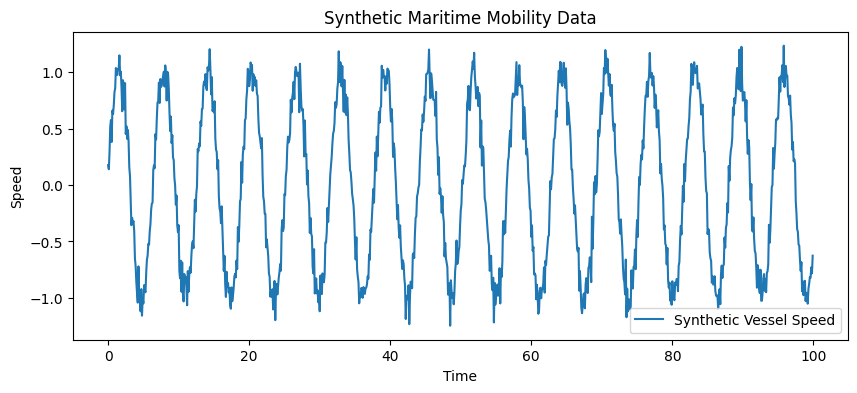

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Generate a simple synthetic dataset
# ----------------------------------------
# Imagine this data represents a vessel's speed over time influenced by tidal patterns.
# We use a sine wave (representing periodic behavior) and add some noise.
np.random.seed(0)  # For reproducibility
time_steps = np.arange(0, 100, 0.1)  # time vector from 0 to 100 with 0.1 step
data = np.sin(time_steps) + np.random.normal(scale=0.1, size=len(time_steps))

# Plot the raw synthetic data
plt.figure(figsize=(10, 4))
plt.plot(time_steps, data, label="Synthetic Vessel Speed")
plt.title("Synthetic Maritime Mobility Data")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.legend()
plt.show()



In [2]:
# 2. Prepare the data for LSTM training
# ----------------------------------------
# We will use a sliding window approach:
# For each sequence of 'window_size' time steps, predict the next value.
window_size = 20  # Number of past time steps used for prediction
X = []
y = []

for i in range(len(data) - window_size):
    X.append(data[i:i + window_size])
    y.append(data[i + window_size])

X = np.array(X)
y = np.array(y)
# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Build the LSTM model
# ----------------------------------------
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)  # Output layer predicting a single value
])
model.compile(optimizer='adam', loss='mse')
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 4. Train the model
# ----------------------------------------
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4960 - val_loss: 0.1821
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1369 - val_loss: 0.0169
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - val_loss: 0.0131
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - val_loss: 0.0108
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0127 - val_loss: 0.0112
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

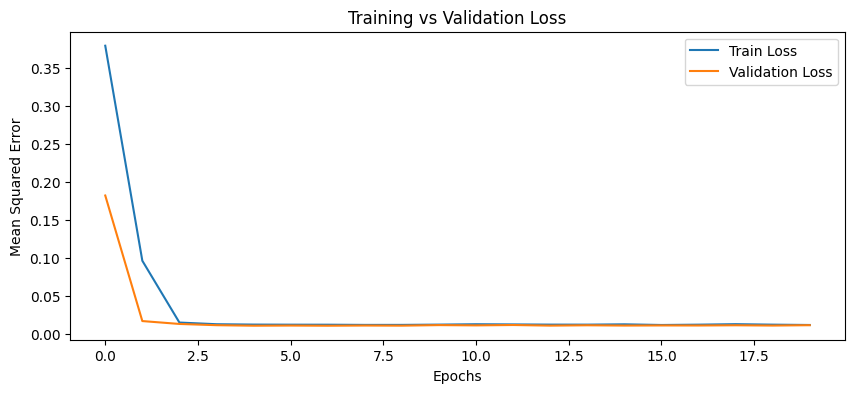

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


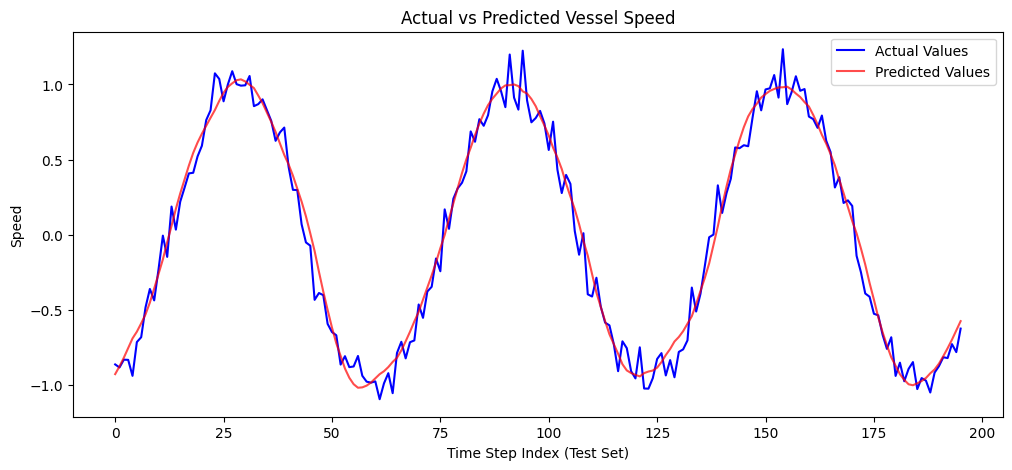

In [4]:
# 5. Plot training performance
# ----------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

# 6. Evaluate prediction performance on the test set
# ----------------------------------------
predictions = model.predict(X_test)

plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
plt.title("Actual vs Predicted Vessel Speed")
plt.xlabel("Time Step Index (Test Set)")
plt.ylabel("Speed")
plt.legend()
plt.show()
